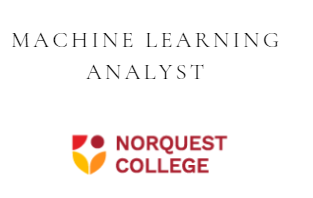

# Getting Location Data

# Generate Maps for your dataset


1. Extract Neighbourhood information from "Ward" Column

2. Change Neighborhood Information format in [Property Assessment  Dataset ](https://data.edmonton.ca/City-Administration/Property-Assessment-Data-Current-Calendar-Year-/q7d6-ambg)to match Information in Ward Column

3. Match and Extract Latitude & Longitude data based on Neighbourhood

4. Check for Neighbourhoods still missing Location data due to "data validation" errors

5. Generate Map



# Merge the Property Assessment data to our cleaned dataset

First drop all irrelevant columns in the property assessment dataset. All we need is the geo location data and the neighbourhood information.

In [1]:
# Create a DataFrame from the data
import pandas as pd
df = pd.read_csv("cleaned_data_EDA.csv")
property_data = pd.read_csv("Property_Assessment_Data__Current_Calendar_Year_.csv")

In [2]:
df.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback,Ward
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodbend Ward
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward


In [3]:
property_data.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194976,NaN,15927.0,88A AVENUE NW,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak Ward,336000,53.522497,-113.597974,POINT (-113.59797430793354 53.5224970838542),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,1034339,NaN,9420.0,92 STREET NW,N,6710.0,STRATHEARN,Métis Ward,49836000,53.530949,-113.469279,POINT (-113.46927857387664 53.53094866121484),100,NaN,NaN,OTHER RESIDENTIAL,NaN,NaN
2,1115245,NaN,15015.0,75 AVENUE NW,Y,4430.0,RIO TERRACE,sipiwiyiniwak Ward,669500,53.507872,-113.580945,POINT (-113.58094456673385 53.50787175287048),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,1012293,NaN,15112.0,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,268500,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,1191832,NaN,9311.0,175 AVENUE NW,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,358500,53.636637,-113.485140,POINT (-113.4851395546046 53.636637322100476),100,NaN,NaN,RESIDENTIAL,NaN,NaN


In [4]:
#  delete Suite, House Number , Street Name from property_data

property_data = property_data.drop(['Suite', 'House Number', 'Street Name'], axis=1)


In [5]:
property_data.head()

,Account Number,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194976,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak Ward,336000,53.522497,-113.597974,POINT (-113.59797430793354 53.5224970838542),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,1034339,N,6710.0,STRATHEARN,Métis Ward,49836000,53.530949,-113.469279,POINT (-113.46927857387664 53.53094866121484),100,NaN,NaN,OTHER RESIDENTIAL,NaN,NaN
2,1115245,Y,4430.0,RIO TERRACE,sipiwiyiniwak Ward,669500,53.507872,-113.580945,POINT (-113.58094456673385 53.50787175287048),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,1012293,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,268500,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,1191832,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,358500,53.636637,-113.485140,POINT (-113.4851395546046 53.636637322100476),100,NaN,NaN,RESIDENTIAL,NaN,NaN


In [6]:

# # Extract Neighbourhood from Ward column (assuming the neighbourhood name is the first part of the Ward column)

df['Ward'] = df['Ward'].astype(str)
df['Neighbourhood'] = df['Ward'].str.split(' Ward').str[0]
df.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback,Ward,Neighbourhood
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodbend Ward,Woodbend
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,Clareview
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,Lee Ridge
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,Forest Heights
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,Lee Ridge


In [7]:
df.shape

(447, 20)

In [8]:
property_data.shape

(426913, 15)

# Merge

In [9]:
# Step 1: Ensure both 'Neighbourhood' columns are in the same case
df['Neighbourhood'] = df['Neighbourhood'].str.upper()  # Convert to uppercase to match property data
df.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,How many routes did you complete?,Additional Routes completed (2 routes),Additional routes completed (3 routes),Additional routes completed (3 routes)2,Additional routes completed (More than 3 Routes),Additional routes completed (More than 3 Routes)2,Additional routes completed (More than 3 Routes)3,Comments or Feedback,Ward,Neighbourhood
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woodbend Ward,WOODBEND
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clareview Ward,CLAREVIEW
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,LEE RIDGE
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Heights Ward,FOREST HEIGHTS
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,2,2,NaN,NaN,NaN,NaN,NaN,NaN,Lee Ridge Ward,LEE RIDGE


In [10]:
# Step 2: Merge the datasets on 'Neighbourhood'
merged_df = pd.merge(df, property_data, on='Neighbourhood', how='left')  # 'left' to retain the size of the food drive data
merged_df.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,161500.0,53.473252,-113.445137,POINT (-113.44513713258402 53.473251519945975),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,304500.0,53.468633,-113.448336,POINT (-113.4483358051496 53.46863299770873),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN


In [11]:
merged_df.shape

(484841, 34)

In [12]:
# Step 2: Drop duplicates in the property data to ensure only unique neighbourhood matches
property_data_unique = property_data.drop_duplicates(subset='Neighbourhood')
property_data_unique.shape



(403, 15)

In [13]:
# Step 3: Merge the datasets on 'Neighbourhood', keeping only the first match (left join)
merged_df = pd.merge(df, property_data_unique, on='Neighbourhood', how='left')
merged_df.head()


,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,837500.0,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN


In [14]:
merged_df.shape

(447, 34)

In [15]:

# Save or display the merged data
merged_df.to_csv('merged_food_drive_property_data.csv', index=False)


“The Open Geospatial Solutions (opengeos) GitHub organization hosts a collection of open-source geospatial software projects. The projects are developed by a community of geospatial software developers and researchers...”

𝐓𝐡𝐞𝐢𝐫 𝐜𝐨𝐥𝐥𝐞𝐜𝐭𝐢𝐨𝐧 𝐚𝐬 𝐨𝐟 𝐭𝐨𝐝𝐚𝐲:

𝐏𝐲𝐭𝐡𝐨𝐧 𝐏𝐚𝐜𝐤𝐚𝐠𝐞𝐬
- earthformer: https://ow.ly/ZonI50PZm8i
- geemap: https://ow.ly/AK7x50PZm88
- geoai: https://ow.ly/64wE50PZm83
- geospatial: https://ow.ly/1PPM50PZm8h
- geospatial-ml: https://ow.ly/p9Bf50PZm86
- leafmap: https://ow.ly/6wJR50PZm8m
- lidar: https://ow.ly/rxTP50PZm8j
- mapwidget: https://ow.ly/QfH250PZm7Y
- open-buildings: https://ow.ly/7L2M50PZm81
- pygis: https://ow.ly/xtX650PZm8f
- segment-anything-py: https://ow.ly/mKnM50PZm8c
- segment-geospatial: https://ow.ly/moZi50PZm7X
- whitebox-python: https://ow.ly/JF8I50PZm8o
- whiteboxgui: https://ow.ly/vPyM50PZm82

𝐃𝐚𝐭𝐚 𝐂𝐚𝐭𝐚𝐥𝐨𝐠𝐬
- geospatial-data-catalogs: https://ow.ly/ocTO50PZm8p
- aws-open-data: https://ow.ly/CNQF50PZm8b
- aws-open-data-geo: https://ow.ly/tIVz50PZm7W
- aws-open-data-stac: https://ow.ly/i5Ir50PZm8k
- Earth-Engine-Catalog: https://ow.ly/UW9150PZm8e
- NASA-CMR-STAC: https://ow.ly/KXOj50PZm8l
- stac-index-catalogs: https://ow.ly/YQma50PZm85
- maxar-open-data: https://ow.ly/CI7j50PZm84
- data: https://ow.ly/3muu50PZm7Z



𝐅𝐨𝐫 𝐦𝐨𝐫𝐞, 𝐟𝐨𝐥𝐥𝐨𝐰 𝐭𝐡𝐞𝐦 𝐡𝐞𝐫𝐞: https://ow.ly/sFZf50PZm87

We will be using Plotly's Open Street Map

[Plotly Open source Maps](https://plotly.com/python/maps/)

In [16]:
import pandas as pd
import plotly.express as px

### Sample Dataset- Bearspaw Chapel Only!!!

# Use your Merged dataset for this

In [17]:
# Create a DataFrame from the data
df = pd.read_csv("merged_food_drive_property_data.csv")

In [18]:
df.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,837500.0,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 34 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   How did you receive the form?                      447 non-null    object 
 1   Drop Off Location                                  447 non-null    object 
 2   Stake                                              447 non-null    object 
 3   Route Number/Name                                  447 non-null    object 
 4   Time to Complete (min)                             447 non-null    object 
 5   No of Adult Volunteers                             447 non-null    int64  
 6   No of Youth Volunteers                             447 non-null    int64  
 7   Doors in Route                                     447 non-null    int64  
 8   Donation Bags Collected                            447 non-null    int64  
 9   Completed 

# Missing Location Data

Ideally , you should find the missing data using the property dataset, but for test purposes we will be deleting the missing location data

In [20]:
# Filter out rows with missing Latitude or Longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

In [21]:
# Set the map style to "open-street-map" and create the map
fig = px.scatter_mapbox(df,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Neighbourhood',  # Hover information. You can change this to Neighbourhood.
                        zoom=12)  # Adjust the zoom level as needed

In [22]:
# Update map layout to use OpenStreetMap style
fig.update_layout(mapbox_style='open-street-map')

In [23]:
# Show the map
fig.show()

In [24]:
# Load the dataset
data = pd.read_csv('merged_food_drive_property_data.csv')

In [25]:
data.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,837500.0,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN


In [26]:

# Assuming 'data' is your DataFrame
data['Ward_x'] = data['Ward_x'].astype(str)


In [27]:
# Extract neighbourhood from the 'Ward' column
data['Neighbourhood'] = data['Ward_x'].apply(lambda x: ' '.join(x.split()[:-1]))
#In this code, the split() function splits the 'Ward' column by space, and [:-1] extracts all parts except the last one (in this case, it removes 'Ward'). Then, ' '.join() combines the remaining parts back into a string. The results will be stored in the new 'Neighbourhood' column in your DataFrame


data.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,837500.0,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN


In [28]:
data.nunique()

,0
How did you receive the form?,2
Drop Off Location,7
Stake,5
Route Number/Name,257
Time to Complete (min),4
No of Adult Volunteers,8
No of Youth Volunteers,11
Doors in Route,196
Donation Bags Collected,77
Completed More Than One Route,2


In [29]:
# Load the Property dataset
property_data = pd.read_csv('Property_Assessment_Data__Current_Calendar_Year_.csv')

In [30]:
property_data.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194976,NaN,15927.0,88A AVENUE NW,Y,4310.0,MEADOWLARK PARK,sipiwiyiniwak Ward,336000,53.522497,-113.597974,POINT (-113.59797430793354 53.5224970838542),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,1034339,NaN,9420.0,92 STREET NW,N,6710.0,STRATHEARN,Métis Ward,49836000,53.530949,-113.469279,POINT (-113.46927857387664 53.53094866121484),100,NaN,NaN,OTHER RESIDENTIAL,NaN,NaN
2,1115245,NaN,15015.0,75 AVENUE NW,Y,4430.0,RIO TERRACE,sipiwiyiniwak Ward,669500,53.507872,-113.580945,POINT (-113.58094456673385 53.50787175287048),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,1012293,NaN,15112.0,45 AVENUE NW,Y,5340.0,RAMSAY HEIGHTS,pihêsiwin Ward,268500,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,1191832,NaN,9311.0,175 AVENUE NW,Y,2450.0,LAGO LINDO,tastawiyiniwak Ward,358500,53.636637,-113.485140,POINT (-113.4851395546046 53.636637322100476),100,NaN,NaN,RESIDENTIAL,NaN,NaN


# Data Validation

In [31]:
# Convert 'Neighbourhood' column in the first dataset to sentence case
property_data['Neighbourhood'] = property_data['Neighbourhood'].str.title()

In [32]:
property_data.head()

,Account Number,Suite,House Number,Street Name,Garage,Neighbourhood ID,Neighbourhood,Ward,Assessed Value,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3
0,1194976,NaN,15927.0,88A AVENUE NW,Y,4310.0,Meadowlark Park,sipiwiyiniwak Ward,336000,53.522497,-113.597974,POINT (-113.59797430793354 53.5224970838542),100,NaN,NaN,RESIDENTIAL,NaN,NaN
1,1034339,NaN,9420.0,92 STREET NW,N,6710.0,Strathearn,Métis Ward,49836000,53.530949,-113.469279,POINT (-113.46927857387664 53.53094866121484),100,NaN,NaN,OTHER RESIDENTIAL,NaN,NaN
2,1115245,NaN,15015.0,75 AVENUE NW,Y,4430.0,Rio Terrace,sipiwiyiniwak Ward,669500,53.507872,-113.580945,POINT (-113.58094456673385 53.50787175287048),100,NaN,NaN,RESIDENTIAL,NaN,NaN
3,1012293,NaN,15112.0,45 AVENUE NW,Y,5340.0,Ramsay Heights,pihêsiwin Ward,268500,53.484560,-113.581913,POINT (-113.58191288991183 53.48456049274555),100,NaN,NaN,RESIDENTIAL,NaN,NaN
4,1191832,NaN,9311.0,175 AVENUE NW,Y,2450.0,Lago Lindo,tastawiyiniwak Ward,358500,53.636637,-113.485140,POINT (-113.4851395546046 53.636637322100476),100,NaN,NaN,RESIDENTIAL,NaN,NaN


In [33]:
# Merge the two dataframes on the Neighbourhood column
# Use how="left" to keep all the rows from the initial dataset "data"
# Use suffixes to distinguish the columns from each dataframe
merged = pd.merge(data, property_data, on="Neighbourhood", how="left", suffixes=("_data", "_property_data"))
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484841 entries, 0 to 484840
Data columns (total 51 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   How did you receive the form?                      484841 non-null  object 
 1   Drop Off Location                                  484841 non-null  object 
 2   Stake                                              484841 non-null  object 
 3   Route Number/Name                                  484841 non-null  object 
 4   Time to Complete (min)                             484841 non-null  object 
 5   No of Adult Volunteers                             484841 non-null  int64  
 6   No of Youth Volunteers                             484841 non-null  int64  
 7   Doors in Route                                     484841 non-null  int64  
 8   Donation Bags Collected                            484841 non-null  int64 

In [34]:
merged.head()
#A  lot of duplication

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value_property_data,Latitude_property_data,Longitude_property_data,Point Location_property_data,Assessment Class % 1_property_data,Assessment Class % 2_property_data,Assessment Class % 3_property_data,Assessment Class 1_property_data,Assessment Class 2_property_data,Assessment Class 3_property_data
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,28618500.0,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN
3,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,161500.0,53.473252,-113.445137,POINT (-113.44513713258402 53.473251519945975),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
4,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,304500.0,53.468633,-113.448336,POINT (-113.4483358051496 53.46863299770873),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN


In [35]:
merged.tail()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Assessed Value_property_data,Latitude_property_data,Longitude_property_data,Point Location_property_data,Assessment Class % 1_property_data,Assessment Class % 2_property_data,Assessment Class % 3_property_data,Assessment Class 1_property_data,Assessment Class 2_property_data,Assessment Class 3_property_data
484836,via Email,Riverbend Stake Centre,Riverbend Stake,Greenfield 3,1 Hour - 1.5 Hours,1,0,140,33,No,...,8000.0,53.472283,-113.521822,POINT (-113.52182247960292 53.47228327516892),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
484837,via Email,Riverbend Stake Centre,Riverbend Stake,Greenfield 3,1 Hour - 1.5 Hours,1,0,140,33,No,...,8000.0,53.472671,-113.534396,POINT (-113.53439583454548 53.47267080697447),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN
484838,via Email,Riverbend Stake Centre,Riverbend Stake,Greenfield 3,1 Hour - 1.5 Hours,1,0,140,33,No,...,1649500.0,53.475609,-113.528801,POINT (-113.52880147394984 53.47560888476132),100.0,NaN,NaN,COMMERCIAL,NaN,NaN
484839,via Email,Riverbend Stake Centre,Riverbend Stake,Greenfield 3,1 Hour - 1.5 Hours,1,0,140,33,No,...,2226000.0,53.475691,-113.529555,POINT (-113.52955549361387 53.475691282126654),100.0,NaN,NaN,COMMERCIAL,NaN,NaN
484840,via Email,Riverbend Stake Centre,Riverbend Stake,56,1 Hour - 1.5 Hours,3,0,121,45,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
merged.nunique()

,0
How did you receive the form?,2
Drop Off Location,7
Stake,5
Route Number/Name,257
Time to Complete (min),4
No of Adult Volunteers,8
No of Youth Volunteers,11
Doors in Route,196
Donation Bags Collected,77
Completed More Than One Route,2


# Add a unique identifier to data to enable us delete all duplicates

In [37]:
# assign a unique ID to each group of identical rows
data['ID'] = data.groupby(data.columns.tolist(), sort=False).ngroup() + 1
data.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3,ID
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN,NaN


In [38]:
# Merge the tables on the 'Neighbourhood' column
# Perform an inner join on 'Neighbourhood' column
merged_data = pd.merge(data, property_data[['Neighbourhood', 'Latitude', 'Longitude']], on='Neighbourhood', how='inner')

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484633 entries, 0 to 484632
Data columns (total 37 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   How did you receive the form?                      484633 non-null  object 
 1   Drop Off Location                                  484633 non-null  object 
 2   Stake                                              484633 non-null  object 
 3   Route Number/Name                                  484633 non-null  object 
 4   Time to Complete (min)                             484633 non-null  object 
 5   No of Adult Volunteers                             484633 non-null  int64  
 6   No of Youth Volunteers                             484633 non-null  int64  
 7   Doors in Route                                     484633 non-null  int64  
 8   Donation Bags Collected                            484633 non-null  int64 

# Download Dataset

In [39]:
merged_data.to_csv('merged_data.csv', index=False)

In [40]:
# delete duplicates based on the unique identifier- "ID"
merged_data = merged_data.drop_duplicates(subset='ID')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   How did you receive the form?                      1 non-null      object 
 1   Drop Off Location                                  1 non-null      object 
 2   Stake                                              1 non-null      object 
 3   Route Number/Name                                  1 non-null      object 
 4   Time to Complete (min)                             1 non-null      object 
 5   No of Adult Volunteers                             1 non-null      int64  
 6   No of Youth Volunteers                             1 non-null      int64  
 7   Doors in Route                                     1 non-null      int64  
 8   Donation Bags Collected                            1 non-null      int64  
 9   Completed More Than

# Download Dataset

In [41]:
merged_data.to_csv('merged_data.csv', index=False)

# ALTERNATIVELY,

Drop irrelevant columns in property dataset except Latitude & Longitude by index (20 &21)

In [42]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484841 entries, 0 to 484840
Data columns (total 51 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   How did you receive the form?                      484841 non-null  object 
 1   Drop Off Location                                  484841 non-null  object 
 2   Stake                                              484841 non-null  object 
 3   Route Number/Name                                  484841 non-null  object 
 4   Time to Complete (min)                             484841 non-null  object 
 5   No of Adult Volunteers                             484841 non-null  int64  
 6   No of Youth Volunteers                             484841 non-null  int64  
 7   Doors in Route                                     484841 non-null  int64  
 8   Donation Bags Collected                            484841 non-null  int64 

In [43]:

merged = merged.drop(merged.columns[[12,13,14,15,16,17,18,19,22,23,24,25,26,27,28]], axis=1)
merged.nunique()

,0
How did you receive the form?,2
Drop Off Location,7
Stake,5
Route Number/Name,257
Time to Complete (min),4
No of Adult Volunteers,8
No of Youth Volunteers,11
Doors in Route,196
Donation Bags Collected,77
Completed More Than One Route,2


NOte that with this method we still have 480 unique IDs of which some may have missing values (See Longitude & Latitude Columns) that can be updated manually.

In [44]:
# delete duplicates based on the unique identifier- "ID"
# merged_data['ID'] = merged_data['ID'].astype(str)
# merged = merged.drop_duplicates(subset='ID')
# merged.info()
merged_data['ID'] = merged_data['ID'].astype(str)
merged_data = merged_data.drop_duplicates(subset='ID')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   How did you receive the form?                      1 non-null      object 
 1   Drop Off Location                                  1 non-null      object 
 2   Stake                                              1 non-null      object 
 3   Route Number/Name                                  1 non-null      object 
 4   Time to Complete (min)                             1 non-null      object 
 5   No of Adult Volunteers                             1 non-null      int64  
 6   No of Youth Volunteers                             1 non-null      int64  
 7   Doors in Route                                     1 non-null      int64  
 8   Donation Bags Collected                            1 non-null      int64  
 9   Completed More Than


# Download the Datasets.







In [45]:
merged.to_csv('merged.csv', index=False)

In [46]:
property_data.to_csv('Property_data.csv', index=False)

In [47]:
data.to_csv('Updated_neighbourhood_data.csv', index=False)

# Manual Updates

Notice that Belmead is missing Neighbourhood Information.
Refer to the Additional Dataset in Norquest REPO and update the neighbourhood info accordingly.

Also update the Location Data (Longitude & Latitude only) based on Neighbourhood info

Upload Updated Data

In [48]:
# Load the dataset
Location_data_updated = pd.read_csv('Updated_neighbourhood_data.csv')

In [49]:
Location_data_updated.head()

,How did you receive the form?,Drop Off Location,Stake,Route Number/Name,Time to Complete (min),No of Adult Volunteers,No of Youth Volunteers,Doors in Route,Donation Bags Collected,Completed More Than One Route,...,Latitude,Longitude,Point Location,Assessment Class % 1,Assessment Class % 2,Assessment Class % 3,Assessment Class 1,Assessment Class 2,Assessment Class 3,ID
0,In person,Bearspaw Chapel,Riverbend Stake,676,0 - 30 Minutes,7,7,78,59,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,In person,Londonberry Chapel,Bonnie Doon Stake,Unassigned,0 - 30 Minutes,1,0,1,1,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,In person,Gateway Stake Centre,Gateway Stake,50,0 - 30 Minutes,2,2,20,20,No,...,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN,NaN
3,In person,Bonnie Doon Stake Centre,Bonnie Doon Stake,98,0 - 30 Minutes,2,2,20,15,No,...,53.550567,-113.454812,POINT (-113.45481240720615 53.55056740256592),100.0,NaN,NaN,RESIDENTIAL,NaN,NaN,NaN
4,In person,Bearspaw Chapel,Gateway Stake,6,30 - 60 Minutes,2,3,144,25,Yes,...,53.472321,-113.450288,POINT (-113.45028784542113 53.4723207293446),89.0,11.0,NaN,COMMERCIAL,COMMERCIAL,NaN,NaN


In [50]:
# Filter out rows with missing Latitude or Longitude values
Location_data_updated = Location_data_updated.dropna(subset=['Latitude', 'Longitude'])

In [51]:
Location_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 2 to 445
Data columns (total 35 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   How did you receive the form?                      239 non-null    object 
 1   Drop Off Location                                  239 non-null    object 
 2   Stake                                              239 non-null    object 
 3   Route Number/Name                                  239 non-null    object 
 4   Time to Complete (min)                             239 non-null    object 
 5   No of Adult Volunteers                             239 non-null    int64  
 6   No of Youth Volunteers                             239 non-null    int64  
 7   Doors in Route                                     239 non-null    int64  
 8   Donation Bags Collected                            239 non-null    int64  
 9   Completed More 

In [52]:
import plotly.express as px
# Set the map style to "open-street-map" and create the map
fig = px.scatter_mapbox(Location_data_updated,
                        lat='Latitude',
                        lon='Longitude',
                        hover_name='Neighbourhood',  # Hover information
                        zoom=12)  # Adjust the zoom level as needed

In [53]:
# Update map layout to use OpenStreetMap style
fig.update_layout(mapbox_style='open-street-map')

In [54]:
# Show the map
fig.show()

To enable the user to input a neighborhood and generate the map dynamically

In [55]:
def generate_map(neighbourhood):
    # Filter the dataset based on the user input
    filtered_data = Location_data_updated[Location_data_updated['Neighbourhood'] == neighbourhood]

    # Check if the filtered data is empty, if so, return a message indicating no data found
    if filtered_data.empty:
        return "No data found for the specified neighborhood."

    # Create the map using the filtered data
    fig = px.scatter_mapbox(filtered_data,
                            lat='Latitude',
                            lon='Longitude',
                            hover_name='Drop off location',
                            zoom=12)

    # Update map layout to use OpenStreetMap style
    fig.update_layout(mapbox_style='open-street-map')

    # Show the map
    fig.show()

# Example usage:
user_neighbourhood = input("Enter the neighborhood: ")
generate_map(user_neighbourhood)


Enter the neighborhood: londonderry ward


'No data found for the specified neighborhood.'